In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("inflasi.csv", sep=",")
df

,Periode,Data Inflasi
0,Januari 2003,8.68
1,Februari 2003,7.60
2,Maret 2003,7.17
3,April 2003,7.62
4,Mei 2003,7.15
...,...,...
235,Agustus 2022,4.69
236,September 2022,5.95
237,Oktober 2022,5.71
238,November 2022,5.42


In [3]:
df_copy = df.copy()

last = len(df_copy.index)
jumlah_prediksi = 72

df_copy = df_copy.drop(index=df.index[last-jumlah_prediksi:last])

df_copy.reset_index(inplace=True, drop=True)
df_copy

,Periode,Data Inflasi
0,Januari 2003,8.68
1,Februari 2003,7.60
2,Maret 2003,7.17
3,April 2003,7.62
4,Mei 2003,7.15
...,...,...
163,Agustus 2016,2.79
164,September 2016,3.07
165,Oktober 2016,3.31
166,November 2016,3.58


In [4]:
df_copy

,Periode,Data Inflasi
0,Januari 2003,8.68
1,Februari 2003,7.60
2,Maret 2003,7.17
3,April 2003,7.62
4,Mei 2003,7.15
...,...,...
163,Agustus 2016,2.79
164,September 2016,3.07
165,Oktober 2016,3.31
166,November 2016,3.58


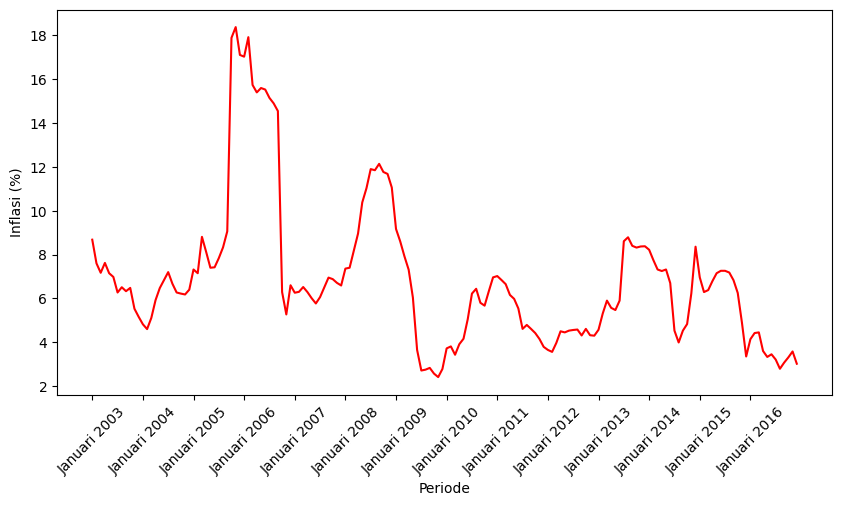

In [5]:
plt.figure(figsize=(10,5))
plt.plot(df_copy['Periode'], df_copy['Data Inflasi'], color='red')
plt.xlabel('Periode')
plt.ylabel('Inflasi (%)')
plt.xticks(rotation=45)
plt.xticks(np.arange(0,len(df_copy.index)-1,12))
plt.show()

In [6]:
Di = df_copy['Data Inflasi']
Dmin = Di.min()
Dmax = Di.max()
U = [Dmin, Dmax]

print(U)

[2.41, 18.38]


In [7]:
# D1 = 0.41
# D2 = 0.62
# R = Dmax+D2 - (Dmin-D1)
R = Dmax - Dmin
n = Di.count()
K = 1 + (3.322 * math.log10(n))
L = (R/K)

print(R, n, K, L)

15.969999999999999 168 8.392477433893315 1.9028946012418921


In [8]:
himpunan_fuzzy = pd.DataFrame()
ui = []
Ai = []
batas_bawah = []
batas_atas = []
ui.append('u1')
Ai.append('A1')
batas_bawah.append(Dmin)
batas_atas.append(batas_bawah[0] + L)
rounded_up = math.ceil(K)

for i in range(1, rounded_up):
    ui.append('u'+str(i+1))
    Ai.append('A'+str(i+1))
    batas_bawah.append(batas_atas[i-1])
    batas_atas.append(batas_bawah[i] + L)

himpunan_fuzzy['ui'] = ui
himpunan_fuzzy['Ai'] = Ai
himpunan_fuzzy['batas bawah'] = batas_bawah
himpunan_fuzzy['batas atas'] = batas_atas

In [9]:
himpunan_fuzzy['mi'] = (himpunan_fuzzy['batas bawah'] + himpunan_fuzzy['batas atas'])/2

In [10]:
himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi
0,u1,A1,2.410000,4.312895,3.361447
1,u2,A2,4.312895,6.215789,5.264342
2,u3,A3,6.215789,8.118684,7.167237
3,u4,A4,8.118684,10.021578,9.070131
4,u5,A5,10.021578,11.924473,10.973026
5,u6,A6,11.924473,13.827368,12.875920
6,u7,A7,13.827368,15.730262,14.778815
7,u8,A8,15.730262,17.633157,16.681710
8,u9,A9,17.633157,19.536051,18.584604


In [11]:
# Misalkan df_copy dan himpunan_fuzzy telah didefinisikan sebelumnya

data_inflasi = df_copy['Data Inflasi']

# Menambah kolom frekuensi ke dalam himpunan_fuzzy
himpunan_fuzzy['frekuensi'] = 0

for i in data_inflasi:
    hf_copy = himpunan_fuzzy
    kondisi1 = hf_copy['batas bawah'] <= i
    kondisi2 = hf_copy['batas atas'] >= i
    dfAi = hf_copy.where(kondisi1 & kondisi2)
    dfAi = dfAi[~dfAi['ui'].isna()]
    
    # Menghitung jumlah data yang memenuhi kriteria
    jumlah_data = len(dfAi)
    
    # Mengupdate frekuensi langsung di dalam himpunan_fuzzy
    himpunan_fuzzy.loc[(himpunan_fuzzy['batas bawah'] <= i) & (himpunan_fuzzy['batas atas'] >= i), 'frekuensi'] += jumlah_data

# Sekarang himpunan_fuzzy sudah memiliki kolom frekuensi yang terisi

In [12]:
himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,2.410000,4.312895,3.361447,31
1,u2,A2,4.312895,6.215789,5.264342,41
2,u3,A3,6.215789,8.118684,7.167237,59
3,u4,A4,8.118684,10.021578,9.070131,17
4,u5,A5,10.021578,11.924473,10.973026,7
5,u6,A6,11.924473,13.827368,12.875920,1
6,u7,A7,13.827368,15.730262,14.778815,6
7,u8,A8,15.730262,17.633157,16.681710,3
8,u9,A9,17.633157,19.536051,18.584604,3


In [13]:
hf_copy = himpunan_fuzzy.copy()
hf_copy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,2.410000,4.312895,3.361447,31
1,u2,A2,4.312895,6.215789,5.264342,41
2,u3,A3,6.215789,8.118684,7.167237,59
3,u4,A4,8.118684,10.021578,9.070131,17
4,u5,A5,10.021578,11.924473,10.973026,7
5,u6,A6,11.924473,13.827368,12.875920,1
6,u7,A7,13.827368,15.730262,14.778815,6
7,u8,A8,15.730262,17.633157,16.681710,3
8,u9,A9,17.633157,19.536051,18.584604,3


In [14]:
# Hitung rata-rata frekuensi
rata_rata = himpunan_fuzzy['frekuensi'].sum() / K
rata_rata_frekuensi = round(rata_rata)
print(rata_rata_frekuensi)

20


In [15]:
rata_rata = rata_rata_frekuensi
frekuensi = hf_copy['frekuensi'] 
batas_atas = hf_copy['batas atas']
batas_bawah = hf_copy['batas bawah']
nilai_tengah = hf_copy['mi']

new_rows = []
new_ui = []
new_Ai = []

current_batas_bawah = Dmin  # Inisialisasi batas bawah

for i in range(len(frekuensi)):
    if frekuensi[i] > rata_rata:
        count = int(frekuensi[i] // rata_rata)
        remainder = frekuensi[i] % rata_rata
        dividen = count + 1
        
        for j in range(count):
            new_ui.append(f'u{len(new_ui) + 1}')
            new_Ai.append(f'A{len(new_Ai) + 1}')
            new_batas_bawah = current_batas_bawah
            new_batas_atas = new_batas_bawah + L / dividen
            new_rows.append([new_ui[-1], new_Ai[-1], new_batas_bawah, new_batas_atas, (new_batas_bawah + new_batas_atas) / 2, rata_rata])
            
            current_batas_bawah = new_batas_atas  # Perbarui batas bawah untuk baris berikutnya
        
        if remainder > 0:
            new_ui.append(f'u{len(new_ui) + 1}')
            new_Ai.append(f'A{len(new_Ai) + 1}')
            new_batas_bawah = current_batas_bawah
            new_batas_atas = new_batas_bawah + L / dividen
            new_rows.append([new_ui[-1], new_Ai[-1], new_batas_bawah, new_batas_atas, (new_batas_bawah + new_batas_atas) / 2, remainder])
            
            current_batas_bawah = new_batas_atas  # Perbarui batas bawah untuk baris berikutnya
    else:
        new_ui.append(f'u{len(new_ui) + 1}')
        new_Ai.append(f'A{len(new_Ai) + 1}')
        new_rows.append([new_ui[-1], new_Ai[-1], batas_bawah[i], batas_atas[i], nilai_tengah[i], frekuensi[i]])

# new_himpunan_fuzzy = pd.DataFrame({
#     'ui': pd.Series(new_ui),
#     'Ai': pd.Series(new_Ai),
#     'batas bawah': pd.Series(new_batas_baw),
#     'batas atas': pd.Series(new_batas_atas),
#     'mi': pd.Series(new_nilai_tengah),
#     'frekuensi': pd.Series(new_frekuensi)
# })

new_himpunan_fuzzy = pd.DataFrame(new_rows, columns=hf_copy.columns)


In [16]:
new_himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,2.410000,3.361447,2.885724,20
1,u2,A2,3.361447,4.312895,3.837171,11
2,u3,A3,4.312895,4.947193,4.630044,20
3,u4,A4,4.947193,5.581491,5.264342,20
4,u5,A5,5.581491,6.215789,5.898640,1
5,u6,A6,6.215789,6.850087,6.532938,20
6,u7,A7,6.850087,7.484386,7.167237,20
7,u8,A8,7.484386,8.118684,7.801535,19
8,u9,A9,8.118684,10.021578,9.070131,17
9,u10,A10,10.021578,11.924473,10.973026,7


In [17]:
new_himpunan_fuzzy

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,2.410000,3.361447,2.885724,20
1,u2,A2,3.361447,4.312895,3.837171,11
2,u3,A3,4.312895,4.947193,4.630044,20
3,u4,A4,4.947193,5.581491,5.264342,20
4,u5,A5,5.581491,6.215789,5.898640,1
5,u6,A6,6.215789,6.850087,6.532938,20
6,u7,A7,6.850087,7.484386,7.167237,20
7,u8,A8,7.484386,8.118684,7.801535,19
8,u9,A9,8.118684,10.021578,9.070131,17
9,u10,A10,10.021578,11.924473,10.973026,7


In [18]:
data_inflasi = df_copy['Data Inflasi']

data_fuzzy = []
for i in data_inflasi:
    copy_hf = new_himpunan_fuzzy
    kondisi1 = copy_hf['batas bawah'] <= i
    kondisi2 = copy_hf['batas atas'] >= i
    dfAi = copy_hf.where(kondisi1 & kondisi2)
    dfAi = dfAi[~dfAi['ui'].isna()]
    if not dfAi.empty:
        fuzzifikasi = dfAi['Ai'].iloc[0]
        data_fuzzy.append(fuzzifikasi)
    else:
        data_fuzzy.append(None)  # Atau berikan nilai default lainnya


df_copy['fuzzifikasi'] = data_fuzzy

In [19]:
df_copy

,Periode,Data Inflasi,fuzzifikasi
0,Januari 2003,8.68,A9
1,Februari 2003,7.60,A8
2,Maret 2003,7.17,A7
3,April 2003,7.62,A8
4,Mei 2003,7.15,A7
...,...,...,...
163,Agustus 2016,2.79,A1
164,September 2016,3.07,A1
165,Oktober 2016,3.31,A1
166,November 2016,3.58,A2


In [20]:
new_hf = new_himpunan_fuzzy.copy()
new_hf

,ui,Ai,batas bawah,batas atas,mi,frekuensi
0,u1,A1,2.410000,3.361447,2.885724,20
1,u2,A2,3.361447,4.312895,3.837171,11
2,u3,A3,4.312895,4.947193,4.630044,20
3,u4,A4,4.947193,5.581491,5.264342,20
4,u5,A5,5.581491,6.215789,5.898640,1
5,u6,A6,6.215789,6.850087,6.532938,20
6,u7,A7,6.850087,7.484386,7.167237,20
7,u8,A8,7.484386,8.118684,7.801535,19
8,u9,A9,8.118684,10.021578,9.070131,17
9,u10,A10,10.021578,11.924473,10.973026,7


In [21]:
next_state = []
for x in range(0, len(df_copy.index)-1):
    Ns = df_copy['fuzzifikasi'].iloc[x+1]
    next_state.append(Ns)

df_copy['next state'] = pd.Series(next_state)

In [22]:
df_copy

,Periode,Data Inflasi,fuzzifikasi,next state
0,Januari 2003,8.68,A9,A8
1,Februari 2003,7.60,A8,A7
2,Maret 2003,7.17,A7,A8
3,April 2003,7.62,A8,A7
4,Mei 2003,7.15,A7,A7
...,...,...,...,...
163,Agustus 2016,2.79,A1,A1
164,September 2016,3.07,A1,A1
165,Oktober 2016,3.31,A1,A2
166,November 2016,3.58,A2,A1


In [23]:
# Membuat FLR 
data_fuzzifikasi = df_copy['fuzzifikasi']
jumlah_Ai = new_hf['Ai']
FLR = []
FLRG = []
i = 0
for i in range(len(data_fuzzifikasi) - 1):
    FLR.append(f"{data_fuzzifikasi[i]}->{data_fuzzifikasi[i+1]}")

df_copy['FLR'] = pd.Series(FLR)


In [24]:
# FLRG
dfFLRG = pd.DataFrame()
dfFLRG['Ai'] = new_hf['Ai']
dfFLRG['FLRG'] = ''
dfFLRG['Total'] = ''

df2 = df_copy[:-1]

for k in range(len(dfFLRG.index)):
    find_Ai = 'A' + str(k + 1)

    new = df2[df2['fuzzifikasi'].isin([find_Ai])]
    group = new['next state']
    group = group.to_numpy()

    if len(group) > 0:
        dfFLRG['FLRG'][k] = group

        total_jumlah = len(group)
        dfFLRG['Total'][k] = total_jumlah

In [25]:
dfFLRG

,Ai,FLRG,Total
0,A1,"[A1, A1, A1, A1, A1, A2, A2, A2, A1, A1, A1, A2]",12
1,A2,"[A1, A2, A2, A2, A2, A4, A2, A2, A2, A2, A3, A...",18
2,A3,"[A3, A4, A3, A3, A3, A2, A3, A3, A3, A3, A2, A...",20
3,A4,"[A4, A3, A5, A6, A6, A3, A5, A4, A5]",9
4,A5,"[A6, A6, A5, A5, A6, A2, A5, A6, A5, A4, A4, A9]",12
5,A6,"[A6, A6, A6, A4, A6, A7, A6, A6, A5, A7, A4, A...",31
6,A7,"[A8, A7, A6, A6, A7, A9, A7, A8, A7, A6, A7, A...",23
7,A8,"[A7, A7, A9, A7, A7]",5
8,A9,"[A8, A9, A7, A9, A14, A9, A10, A9, A8, A9, A9,...",17
9,A10,"[A10, A10, A10, A11, A10, A10, A9]",7


In [26]:
# Membuat LH dan RH
jumlah_Ai = new_hf['Ai']
LH = ['A' + str(i + 1) for i in range(len(jumlah_Ai))]
RH = LH

# Menghitung bobot dan pembobotan baris
initial_weights = []
row_weight_sums = []

for i, label1 in enumerate(LH):
    row_weight_sum = 0
    for j, label2 in enumerate(RH):
        condition = f"{LH[i]}->{RH[j]}"
        weight = sum(1 for relation in FLR if condition == relation)
        initial_weights.append(weight)
        row_weight_sum += weight
    row_weight_sums.append(row_weight_sum)

# Membuat matriks pembobotan
weight_matrix = np.array_split(initial_weights, len(LH))

# Mengubah matriks_pembobotan menjadi DataFrame
df_weight_matrix = pd.DataFrame(weight_matrix, columns=RH, index=LH)

In [27]:
# Menampilkan hasil
print("Matriks Pembobotan dalam DataFrame:")
df_weight_matrix

Matriks Pembobotan dalam DataFrame:


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
A1,8,4,0,0,0,0,0,0,0,0,0,0,0,0
A2,4,8,5,1,0,0,0,0,0,0,0,0,0,0
A3,1,5,11,2,0,1,0,0,0,0,0,0,0,0
A4,0,0,2,2,3,2,0,0,0,0,0,0,0,0
A5,0,1,0,2,4,4,0,0,1,0,0,0,0,0
A6,0,0,2,2,4,16,6,0,1,0,0,0,0,0
A7,0,0,0,0,1,7,11,2,2,0,0,0,0,0
A8,0,0,0,0,0,0,4,0,1,0,0,0,0,0
A9,0,0,0,0,0,0,2,3,10,1,0,0,0,1
A10,0,0,0,0,0,0,0,0,1,5,1,0,0,0


In [28]:
normalized_weight_matrix = []

for i in range(len(LH)):
    row_normalized_weights = []
    for j in range(len(RH)):
        try:
            if weight_matrix[i][j] == 0:
                normalized_weight = 0
            else:
                normalized_weight = weight_matrix[i][j] / row_weight_sums[i]
                if math.isnan(normalized_weight):
                    normalized_weight = 0
        except:
            normalized_weight = 0
        row_normalized_weights.append(normalized_weight)
    normalized_weight_matrix.append(row_normalized_weights)

# Membuat DataFrame
df_normalized_weight_matrix = pd.DataFrame(normalized_weight_matrix, columns=LH, index=RH)

In [29]:
# Menampilkan DataFrame matriks terstandarisasi
df_normalized_weight_matrix

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
A1,0.666667,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2,0.222222,0.444444,0.277778,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A3,0.050000,0.250000,0.550000,0.100000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4,0.000000,0.000000,0.222222,0.222222,0.333333,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A5,0.000000,0.083333,0.000000,0.166667,0.333333,0.333333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000
A6,0.000000,0.000000,0.064516,0.064516,0.129032,0.516129,0.193548,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000
A7,0.000000,0.000000,0.000000,0.000000,0.043478,0.304348,0.478261,0.086957,0.086957,0.000000,0.000000,0.000000,0.000000,0.000000
A8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
A9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.117647,0.176471,0.588235,0.058824,0.000000,0.000000,0.000000,0.058824
A10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.714286,0.142857,0.000000,0.000000,0.000000


In [30]:
nilai_tengah = new_hf['mi']
nilai_prediksi = []

for i, x in enumerate(LH):
    hasil = 0
    for j, y in enumerate(RH):
        try:
            nilai = normalized_weight_matrix[i][j] * nilai_tengah[j]
            hasil += nilai
        except:
            nilai = 0
    nilai_prediksi.append(hasil)

dfFLRG['defuzzifikasi'] = nilai_prediksi

In [31]:
dfFLRG

,Ai,FLRG,Total,defuzzifikasi
0,A1,"[A1, A1, A1, A1, A1, A2, A2, A2, A1, A1, A1, A2]",12,3.202873
1,A2,"[A1, A2, A2, A2, A2, A4, A2, A2, A2, A2, A3, A...",18,3.925268
2,A3,"[A3, A4, A3, A3, A3, A2, A3, A3, A3, A3, A2, A...",20,4.503184
3,A4,"[A4, A3, A5, A6, A6, A3, A5, A4, A5]",9,5.616730
4,A5,"[A6, A6, A5, A5, A6, A2, A5, A6, A5, A4, A4, A9]",12,6.096858
5,A6,"[A6, A6, A6, A4, A6, A7, A6, A6, A5, A7, A4, A...",31,6.451093
6,A7,"[A8, A7, A6, A6, A7, A9, A7, A8, A7, A6, A7, A...",23,7.139658
7,A8,"[A7, A7, A9, A7, A7]",5,7.547815
8,A9,"[A8, A9, A7, A9, A14, A9, A10, A9, A8, A9, A9,...",17,9.294001
9,A10,"[A10, A10, A10, A11, A10, A10, A9]",7,10.973026


In [32]:
df2 = df_copy.copy()
df2

,Periode,Data Inflasi,fuzzifikasi,next state,FLR
0,Januari 2003,8.68,A9,A8,A9->A8
1,Februari 2003,7.60,A8,A7,A8->A7
2,Maret 2003,7.17,A7,A8,A7->A8
3,April 2003,7.62,A8,A7,A8->A7
4,Mei 2003,7.15,A7,A7,A7->A7
...,...,...,...,...,...
163,Agustus 2016,2.79,A1,A1,A1->A1
164,September 2016,3.07,A1,A1,A1->A1
165,Oktober 2016,3.31,A1,A2,A1->A2
166,November 2016,3.58,A2,A1,A2->A1


In [33]:
df2['nilai prediksi'] = ''

for x in range(len(new_hf.index)):
    ai = new_hf['Ai'].iloc[x]  #menggunakan iloc untuk mengakses baris berdasarkan indeks
    listAi = df2[df2['fuzzifikasi'] == ai]
    n_prediksi = dfFLRG['defuzzifikasi'].iloc[x]  #menggunakan iloc untuk mengakses nilai berdasarkan indeks

    if len(listAi) > 0: #memastikan listAi tidak kosong
        idx = listAi.index
        for y in idx:
            df2.at[y+1, 'nilai prediksi'] = n_prediksi

In [34]:
df2

,Periode,Data Inflasi,fuzzifikasi,next state,FLR,nilai prediksi
0,Januari 2003,8.68,A9,A8,A9->A8,
1,Februari 2003,7.60,A8,A7,A8->A7,9.294001
2,Maret 2003,7.17,A7,A8,A7->A8,7.547815
3,April 2003,7.62,A8,A7,A8->A7,7.139658
4,Mei 2003,7.15,A7,A7,A7->A7,7.547815
...,...,...,...,...,...,...
164,September 2016,3.07,A1,A1,A1->A1,3.202873
165,Oktober 2016,3.31,A1,A2,A1->A2,3.202873
166,November 2016,3.58,A2,A1,A2->A1,3.202873
167,Desember 2016,3.02,A1,NaN,NaN,3.925268


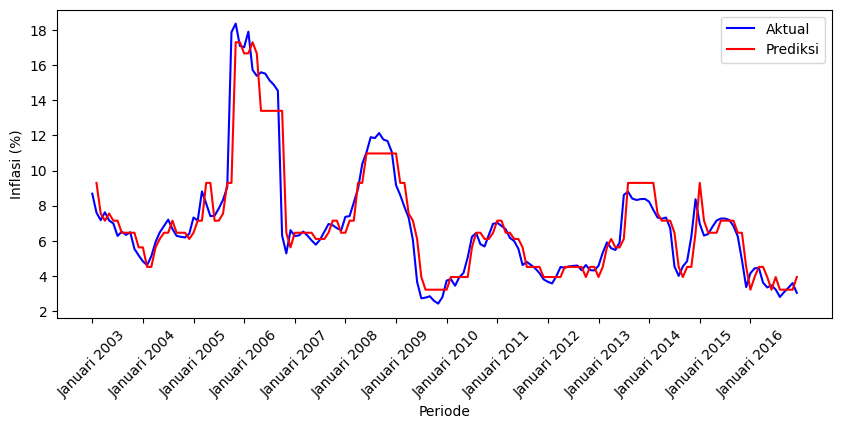

In [35]:
# Buat salinan DataFrame
df2_copy = df2.copy()
df2_copy = df2_copy.drop(index=df2_copy.index[-1])
# df2_copy = df2_copy[df2_copy['nilai prediksi'] != '']

# Reset indeks
df2_copy.reset_index(drop=True, inplace=True)

# Plot data
plt.figure(figsize=(10, 4))
plt.plot(df2_copy['Periode'], df2_copy['Data Inflasi'], color='blue', label='Aktual')
plt.plot(df2_copy['Periode'][1:], df2_copy['nilai prediksi'][1:], color='red', label='Prediksi')
plt.xlabel('Periode')
plt.ylabel('Inflasi (%)')
plt.xticks(rotation=45)
plt.xticks(np.arange(0, len(df2_copy.index), 12))
plt.legend()
plt.show()

In [36]:
y_actual = df2_copy['Data Inflasi'][1:-1].to_numpy()
y_predict = df2_copy['nilai prediksi'][1:-1].to_numpy()

MAPE = mean_absolute_percentage_error(y_actual, y_predict)
print("MAPE =", MAPE * 100)

MAPE = 10.716938291669438


In [37]:
last_index = len(df2.index)
df_predict_next = df2

for f in range(jumlah_prediksi-1):
    nilaiPred = df_predict_next['nilai prediksi'][last_index-1+f]

    copy_hf = new_himpunan_fuzzy
    kondisi1 = copy_hf['batas bawah'] <= nilaiPred
    kondisi2 = copy_hf['batas atas'] >= nilaiPred
    dfAi = copy_hf.where(kondisi1 & kondisi2)
    dfAi = dfAi[~dfAi['ui'].isna()]
    fuzzifikasi = dfAi['Ai'].iloc[0]
    df_predict_next.at[last_index + f-1, 'fuzzifikasi'] = fuzzifikasi

    nP = dfFLRG['defuzzifikasi'][dfFLRG['Ai'] == fuzzifikasi]
    df_predict_next.at[last_index+f, 'nilai prediksi'] = nP.values[0]


In [38]:
df_predict_next

,Periode,Data Inflasi,fuzzifikasi,next state,FLR,nilai prediksi
0,Januari 2003,8.68,A9,A8,A9->A8,
1,Februari 2003,7.60,A8,A7,A8->A7,9.294001
2,Maret 2003,7.17,A7,A8,A7->A8,7.547815
3,April 2003,7.62,A8,A7,A8->A7,7.139658
4,Mei 2003,7.15,A7,A7,A7->A7,7.547815
...,...,...,...,...,...,...
235,NaN,NaN,A1,NaN,NaN,3.202873
236,NaN,NaN,A1,NaN,NaN,3.202873
237,NaN,NaN,A1,NaN,NaN,3.202873
238,NaN,NaN,A1,NaN,NaN,3.202873


In [39]:
df_predict_next[len(df_predict_next.index)-jumlah_prediksi:]

,Periode,Data Inflasi,fuzzifikasi,next state,FLR,nilai prediksi
168,NaN,NaN,A1,NaN,NaN,3.202873
169,NaN,NaN,A1,NaN,NaN,3.202873
170,NaN,NaN,A1,NaN,NaN,3.202873
171,NaN,NaN,A1,NaN,NaN,3.202873
172,NaN,NaN,A1,NaN,NaN,3.202873
...,...,...,...,...,...,...
235,NaN,NaN,A1,NaN,NaN,3.202873
236,NaN,NaN,A1,NaN,NaN,3.202873
237,NaN,NaN,A1,NaN,NaN,3.202873
238,NaN,NaN,A1,NaN,NaN,3.202873


In [40]:
df_result = df.copy()
df_result['nilai prediksi'] = df2['nilai prediksi']
df_result

,Periode,Data Inflasi,nilai prediksi
0,Januari 2003,8.68,
1,Februari 2003,7.60,9.294001
2,Maret 2003,7.17,7.547815
3,April 2003,7.62,7.139658
4,Mei 2003,7.15,7.547815
...,...,...,...
235,Agustus 2022,4.69,3.202873
236,September 2022,5.95,3.202873
237,Oktober 2022,5.71,3.202873
238,November 2022,5.42,3.202873


In [41]:
df_result[len(df_result.index)-jumlah_prediksi:]

,Periode,Data Inflasi,nilai prediksi
168,Januari 2017,3.49,3.202873
169,Februari 2017,3.83,3.202873
170,Maret 2017,3.61,3.202873
171,April 2017,4.17,3.202873
172,Mei 2017,4.33,3.202873
...,...,...,...
235,Agustus 2022,4.69,3.202873
236,September 2022,5.95,3.202873
237,Oktober 2022,5.71,3.202873
238,November 2022,5.42,3.202873


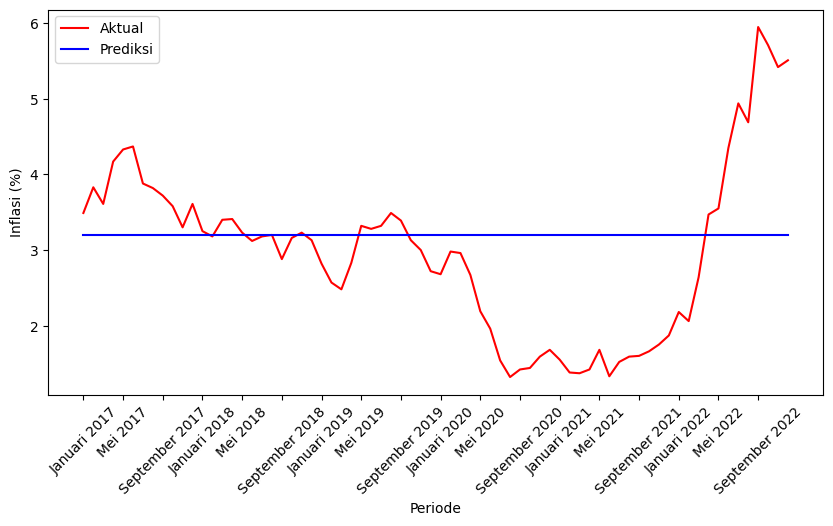

In [42]:
plt.figure(figsize=(10,5))
plt.plot(df_result['Periode'][len(df_result.index)-jumlah_prediksi:], df_result['Data Inflasi'][len(df_result.index)-jumlah_prediksi:], color='red', label='Aktual')
plt.plot(df_result['Periode'][len(df_result.index)-jumlah_prediksi:], df_result['nilai prediksi'][len(df_result.index)-jumlah_prediksi:], color='blue', label='Prediksi')
plt.xlabel('Periode')
plt.ylabel('Inflasi (%)')
plt.xticks(rotation=45)
plt.xticks(np.arange(0,jumlah_prediksi,4))
plt.legend()
plt.show()

In [43]:
# MAPE pred
# df_result.dropna(subset=['nilai prediksi'], inplace=True)
y_actualpred = df_result['Data Inflasi'][last-jumlah_prediksi:len(df_result.index)].to_numpy()
y_predictpred = df_result['nilai prediksi'][last-jumlah_prediksi:len(df_result.index)].to_numpy()

# MAPE
MAPE2 = mean_absolute_percentage_error(y_actualpred, y_predictpred)

print("Hasil MAPE untuk memprediksi data",jumlah_prediksi,"periode ke depan")
print("MAPE = ",MAPE2 * 100)

Hasil MAPE untuk memprediksi data 72 periode ke depan
MAPE =  40.285871667452945


In [44]:
# MAPE all
y_actual2 = df_result['Data Inflasi'][1:len(df_result.index)].to_numpy()
# print(y_actual2)
y_predict2 = df_result['nilai prediksi'][1:len(df_result.index)].to_numpy()
# MAPE
MAPE3 = mean_absolute_percentage_error(y_actual2, y_predict2)

print("MAPE = ",MAPE3*100)

MAPE =  19.705314960336676
